# Tent & Norm Adaptation

In [1]:
import pandas as pd

record = pd.read_csv('./result/audio-mnist/cnn/pre_train/training_records.csv')
record.head()

,Unnamed: 0,type,step,accuracy,loss
0,0,train,0,9.3750,2.302691
1,1,train,1,7.8125,2.302774
2,2,train,2,9.3750,2.299775
3,3,train,3,18.7500,2.292776
4,4,train,4,14.0625,2.299582


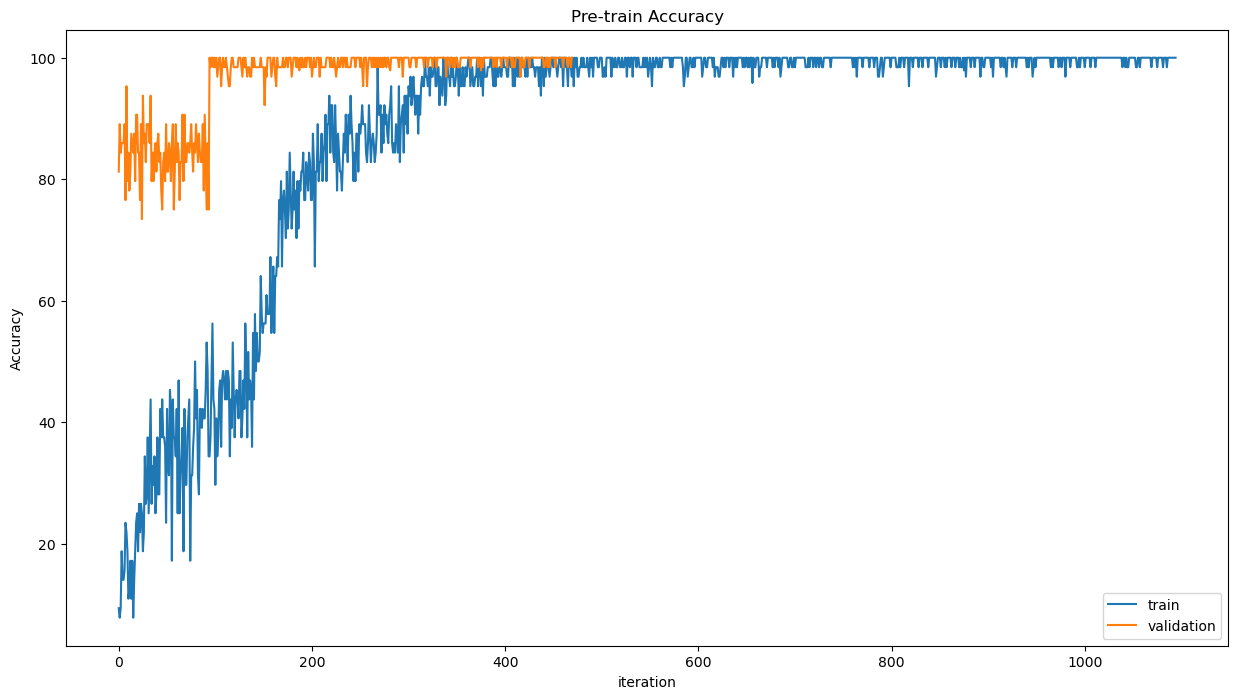

In [2]:
import matplotlib.pyplot as plt

train_record = record[record['type'] == 'train']
val_record = record[record['type'] == 'validation']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='train')
plt.plot(val_record['step'], val_record['accuracy'], label='validation')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

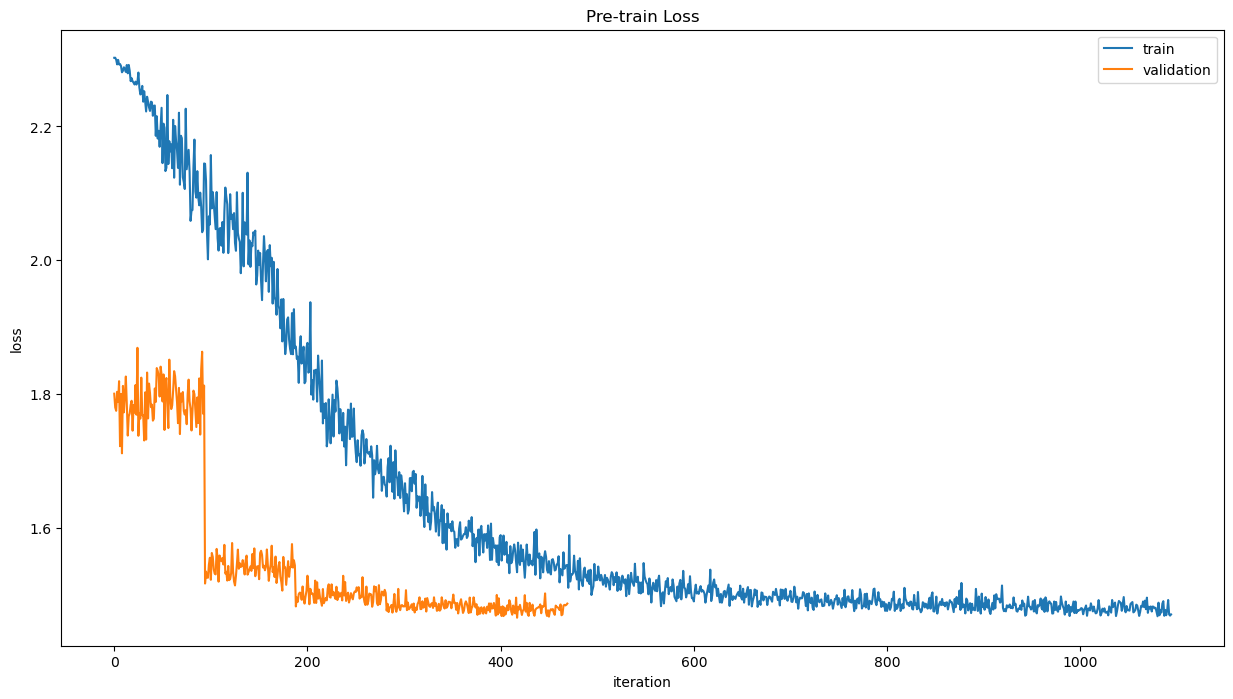

In [3]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='train')
plt.plot(val_record['step'], val_record['loss'], label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test-Time Training (TTT)

In [4]:
record = pd.read_csv('./result/audio-mnist/ttt/pre_time_shift_train/sl_bn_accu_record.csv')
record.head()

,Unnamed: 0,dataset,type,step,accuracy,loss
0,0,audio-mnist,cls,0,9.375000,2.337910
1,1,audio-mnist,ssh,0,26.041667,1.146750
2,2,audio-mnist,cls,1,6.250000,2.344712
3,3,audio-mnist,ssh,1,53.125000,0.961091
4,4,audio-mnist,cls,2,13.541667,2.380224


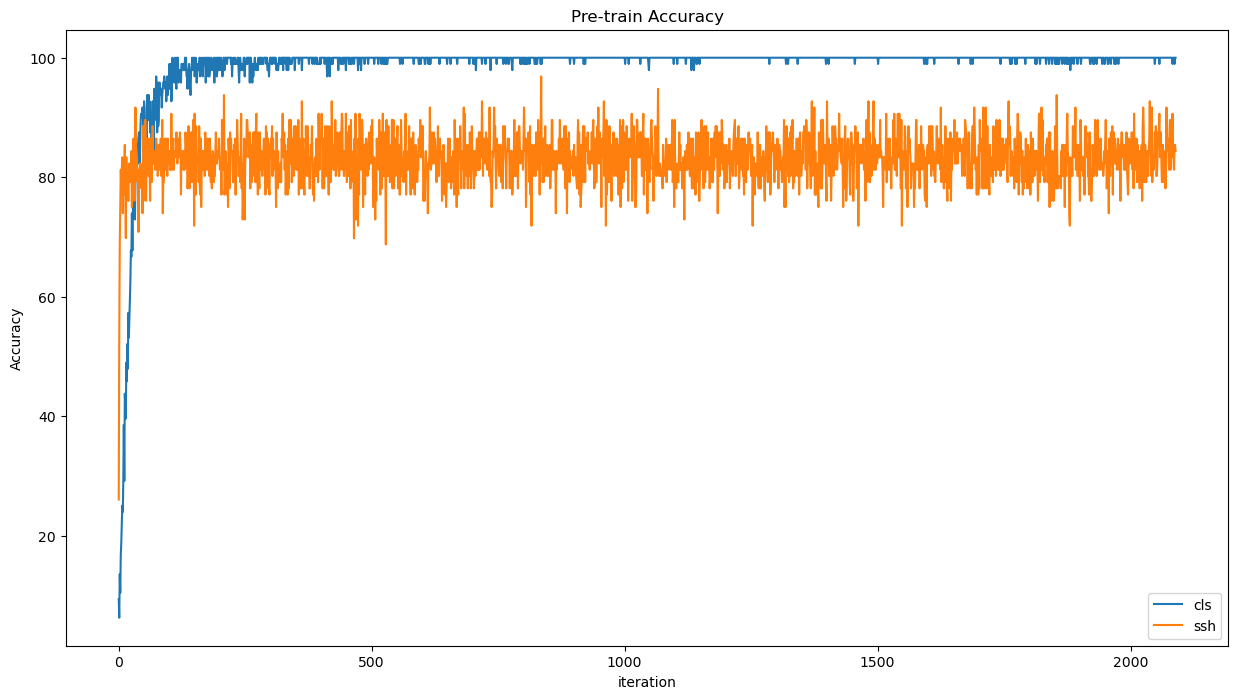

In [5]:
train_record = record[record['type'] == 'cls']
val_record = record[record['type'] == 'ssh']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='cls')
plt.plot(val_record['step'], val_record['accuracy'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

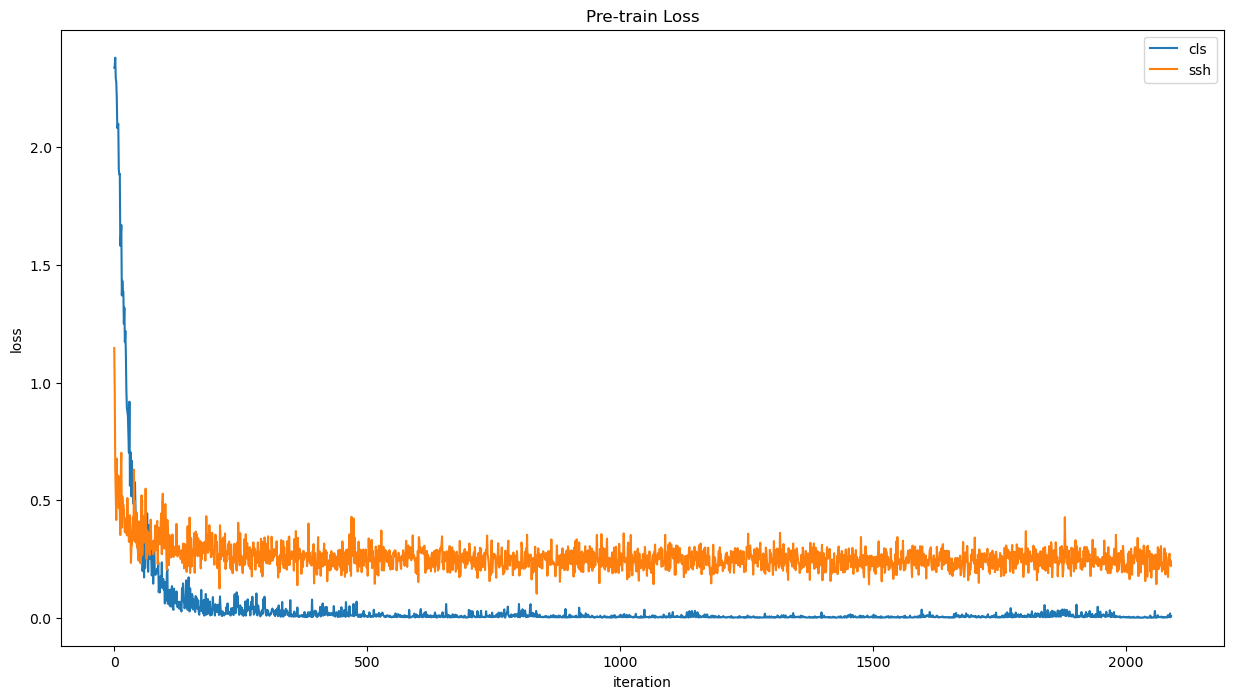

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='cls')
plt.plot(val_record['step'], val_record['loss'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test dataset accuracy comparing

In [7]:
import os

tent_analysis_root_path = './result/audio-mnist/cnn/analysis'
records = []
for sub_path in os.listdir(tent_analysis_root_path):
    if 'accuracy_record' in sub_path and sub_path.endswith('.csv'):
        record = pd.read_csv(os.path.join(tent_analysis_root_path, sub_path))
        records.append(record)
pd.concat(records, axis=0)

,Unnamed: 0,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level
0,0,audio-mnist,cnn,NaN,NaN,94.37,5.63,0.0000
1,1,audio-mnist,cnn,NaN,gaussian_noise,10.35,89.65,0.0025
2,2,audio-mnist,cnn,Tent Adaptation,gaussian_noise,82.22,17.78,0.0025
3,3,audio-mnist,cnn,Norm Adaptation,gaussian_noise,81.29,18.71,0.0025


In [8]:
ttt_analysis_root_path = './result/audio-mnist/ttt/time_shift_analysis'
records = []
for sub_path in os.listdir(ttt_analysis_root_path):
    if 'accuracy_record' in sub_path and sub_path.endswith('.csv'):
        record = pd.read_csv(os.path.join(ttt_analysis_root_path, sub_path))
        records.append(record)
pd.concat(records, axis=0)

,Unnamed: 0,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level
0,0,audio-mnist,RestNet,NaN,NaN,97.31,2.69,0.00000
1,1,audio-mnist,RestNet,NaN,gaussian_noise,51.88,48.12,0.00250
2,2,audio-mnist,RestNet,"TTT, sl, bn",gaussian_noise,68.97,31.03,0.00250
0,0,audio-mnist,RestNet,NaN,NaN,97.37,2.63,0.00000
1,1,audio-mnist,RestNet,NaN,gaussian_noise,12.62,87.38,0.00500
2,2,audio-mnist,RestNet,"TTT, sl, bn",gaussian_noise,59.85,40.15,0.00500
0,0,audio-mnist,RestNet,NaN,NaN,96.96,3.04,0.00000
1,1,audio-mnist,RestNet,NaN,gaussian_noise,54.92,45.08,0.00250
2,2,audio-mnist,RestNet,"TTT, sl, gn",gaussian_noise,51.72,48.28,0.00250
0,0,audio-mnist,RestNet,NaN,NaN,97.36,2.64,0.00000
